In [1]:
import numpy as np

import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.callbacks import TensorBoard
import time
import datetime

In [2]:
import cv2
import random
import pickle


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation

## Training Model -- Single Run

## Database Extraction 

In [9]:
CATEGORIES = ["Dog", "Cat"]
DATADIR = './kagglecatsanddog/PetImages'

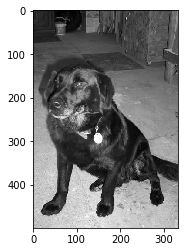

In [10]:
for categories in CATEGORIES:
    path = os.path.join(DATADIR, categories)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        
        break
    break
        
        

In [11]:
img_array.shape

(500, 333)

In [12]:
img_size = 100


new_array = cv2.resize(img_array, (img_size, img_size))

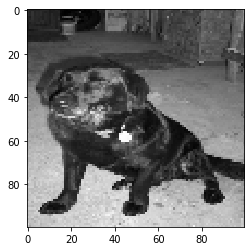

In [13]:
plt.imshow(new_array, cmap = 'gray')

In [14]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (100, 100))
                training_data.append([new_array, class_num])
            except:
                pass


In [15]:
create_training_data()

100%|██████████| 12501/12501 [00:29<00:00, 417.02it/s]


In [134]:
for sample in training_data[0:1]:
    var1 = sample[0]
    print(sample[1])

1


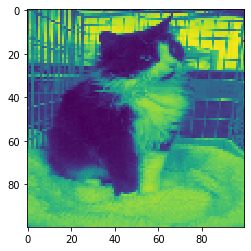

In [136]:
plt.imshow(var1)

In [18]:
random.shuffle(training_data)

In [19]:
for sample in training_data[0:5]:

    print(sample[1])

1
1
1
1
0


In [20]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

In [21]:
X = np.array(X).reshape(-1, 100, 100, 1)

## Saving the Data 


In [22]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## Loading the Model


In [4]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [5]:
y = np.array(y)

In [6]:
X = X/255.0


## Single model Run


In [30]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(64))
#model.add(Activation('relu')) 

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [31]:
model.fit(X,y, batch_size = 32, epochs=3, validation_split=0.17)

Epoch 1/3
648/648 [==============================] - 360s 556ms/step - loss: 0.6076 - accuracy: 0.6548 - val_loss: 0.5519 - val_accuracy: 0.7203
Epoch 2/3
648/648 [==============================] - 304s 469ms/step - loss: 0.4991 - accuracy: 0.7594 - val_loss: 0.4705 - val_accuracy: 0.7713
Epoch 3/3
648/648 [==============================] - 298s 460ms/step - loss: 0.4306 - accuracy: 0.7994 - val_loss: 0.4286 - val_accuracy: 0.7965


In [10]:
X.shape

(24946, 100, 100, 1)

In [32]:
model.save('DogandCat_new')

INFO:tensorflow:Assets written to: DogandCat_new/assets


In [12]:
new_model = tf.keras.models.load_model('DogandCat')

In [13]:
new_model


### Just for Fun


In [14]:
DATADIR1 = './test'

In [40]:
img_array = cv2.imread('111.jpeg', cv2.IMREAD_GRAYSCALE)

        

In [42]:
new_array = cv2.resize(img_array, (100, 100))


In [44]:
new_array = np.array(new_array).reshape(-1, 100, 100, 1)

In [45]:
prediction = new_model.predict([new_array])

In [46]:
prediction

array([[0.]], dtype=float32)

###  Optimization using TensorBoard

## How to use Tensorboard : Quick Log Run


In [25]:
Name = f'CatsandDogs-CNN{datetime.datetime.now()}'
tensorboard = TensorBoard(log_dir = f'logs/{Name}')

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(64))
#model.add(Activation('relu')) 

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(X,y, batch_size = 32, epochs=3, validation_split=0.17, callbacks = [tensorboard])

Epoch 1/3
  1/648 [..............................] - ETA: 0s - loss: 0.6879 - accuracy: 0.5625WARNING:tensorflow:From /Users/rohitmattu/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
648/648 [==============================] - 307s 474ms/step - loss: 0.6324 - accuracy: 0.6326 - val_loss: 0.5719 - val_accuracy: 0.7064
Epoch 2/3
648/648 [==============================] - 297s 459ms/step - loss: 0.5080 - accuracy: 0.7528 - val_loss: 0.5507 - val_accuracy: 0.7262
Epoch 3/3
648/648 [==============================] - 504s 778ms/step - loss: 0.4421 - accuracy: 0.7907 - val_loss: 0.4487 - val_accuracy: 0.7979


## Optimization using Tensorboard:

**We have used the 1-2-3 Layer ConvolutionLayers and 32-64-128 Nodes Network Alterations:**

In [7]:
cnn_layers = [1,2,3]
layer_size = [32,64,128,256]
dense_layers = [0,1]



In [ ]:

for dense in dense_layers:
    for size in layer_size:
        for cnn_layer in cnn_layers:
            
            Name = f'CatsandDogs-{cnn_layer}-CNN-{size}-Nodes-{dense}-Dense{datetime.datetime.now()}'
            tensorboard = TensorBoard(log_dir = f'logs/{Name}')

            model = Sequential()
            
         
            model.add(Conv2D(size, (3,3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for i in range(cnn_layer-1):
                model.add(Conv2D(64, (3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

           
            for j in range(dense):
                model.add(Dense(64))
                model.add(Activation('relu'))
            
            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])


            model.fit(X,y, batch_size = 32, epochs=10, validation_split=0.17, callbacks = [tensorboard])

## CONCLUSION :

### For No dense layer   

### The best Performing layer was 3-CNN-32-NODES-0-DENSE AND 3-CNN-64-NODES-0-DENSE FOR epochs > 5

## and 

### The best Performing layer was 3-CNN-128-NODES-0-DENSE for epochs < 5
